In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
data = pd.read_csv('data.csv')
data

,Current,2Q1,2Q2,2Q3
0,104,87.8,94.0,100.0
1,132,69.5,72.5,79.0
2,160,56.0,60.2,65.2
3,187,48.0,51.5,55.5
4,214,41.8,44.8,48.0
5,241,37.5,39.2,42.2
6,267,33.2,35.2,37.8


In [89]:
data["1/I"] = 1/data["Current"]

In [90]:
plt.rcdefaults()

In [91]:
def poly_regression(X, Y, order=3, plot=True, stats = True, title=None, filename="img.jpg"):
    """
    Polynomial regression of order m using least squares method.
    
    Parameters
    ----------
    X : array_like
        Independent variable.
    Y : array_like
        Dependent variable.
    order : int, optional
        Order of the polynomial. Default is 3.
    plot : bool, optional
        If True, plot the regression line. Default is True.
    statistics : bool, optional
        If True, return the statistics. Default is True.

    Returns
    -------
    beta : array_like
        Coefficients of the polynomial regression model.
    stats : dict
        Statistics of the polynomial regression model.
        `r2` : square of correlation coefficient
        `syx` : standard error of the estimate
    """
    Xis = np.zeros(2*order+1)
    Yis = np.zeros(order+1)
    n= len(X)
    for i in range(0, 2*order+1):
        if i ==0:
            Xis[i] = n
            continue
        xi = np.sum(X**i)
        Xis[i] = xi
        
    for i in range(1, order+2):
        yi = np.sum(Y*(X**(i-1)))
        Yis[i-1] = yi
    A = np.zeros((order+1, order+1))
    for i in range(0, order+1):
        A[i] = Xis[i:i+order+1]
    beta = np.linalg.solve(A,Yis)

    if plot:
        X_l = np.linspace(np.min(X)-np.std(X),np.max(X)+np.std(X), 100)
        def predict(X_l):
            Y_l = 0
            for i in range(0, order+1):
                Y_l += beta[i]*X_l**i
            return Y_l
        Y_l = predict(X_l)
        plt.figure(figsize=(10,8))
        plt.scatter(X,Y)
        plt.plot(X_l,Y_l, "r")
        plt.xlim(np.min(X)-np.std(X),np.max(X)+np.std(X))
        plt.ylim(np.min(Y)-np.std(Y),np.max(Y)+np.std(Y))
        plt.xlabel(r"$\frac{1}{I}$ ($\frac{1}{A}$)", fontsize=15)
        plt.ylabel("Q (V)",  fontsize=15)
        text = "Regression line: "
        text += f"$Y = {round(beta[1],4)}X{round(beta[0],4)}$"
        plt.annotate(text, xy=(0.6, 0.3), xycoords='axes fraction',
                        xytext=(0, -30), textcoords='offset points',
                        ha='center', va='top', fontsize=15)
        plt.title(title)
        plt.grid()
        plt.tight_layout()
        plt.savefig(filename)
        plt.show();

    if stats:
        xmean = np.mean(X)
        ymean = np.mean(Y)
        y_pred = predict(X)
        Sr = np.sum((Y-y_pred)**2)
        SYX = np.sqrt(Sr/(n-order-1))
        #r2
        r2 = (np.sum((Y-ymean)**2)-Sr)/(np.sum((Y-ymean)**2))
        stats = {"r2": r2, "syx": SYX}
        return beta, stats
    else:
        return beta
    

### $\nu_1$

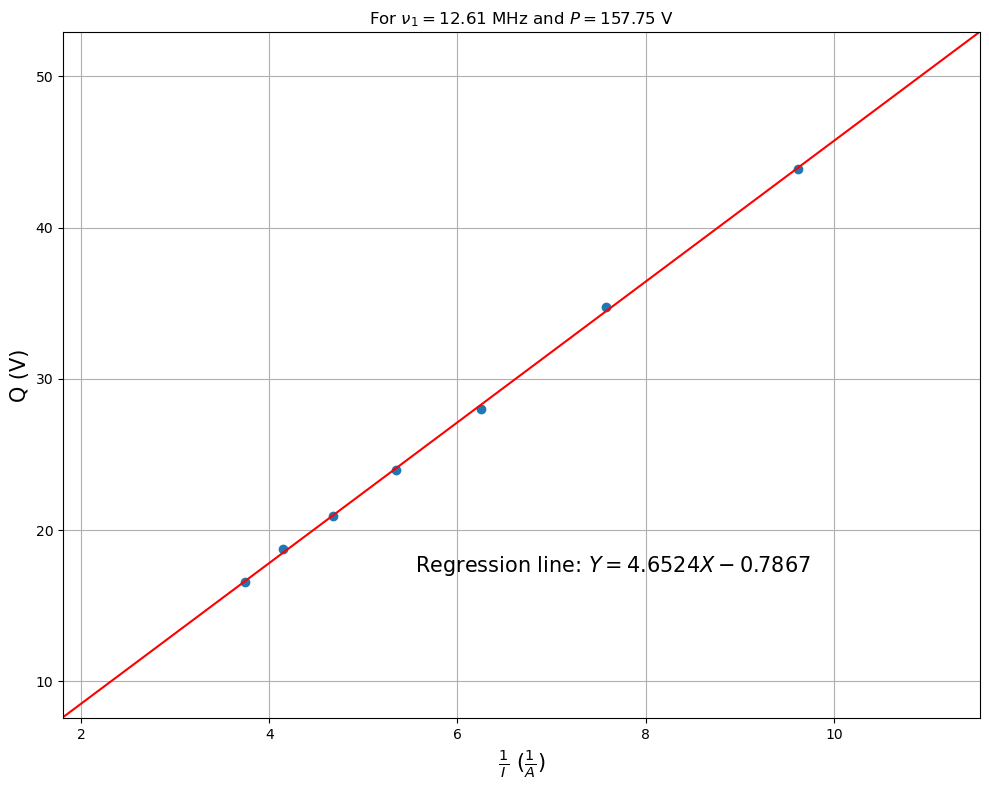

(array([-0.78670693,  4.65241847]),
 {'r2': 0.9995805908800784, 'syx': 0.21836831246653468})

In [92]:
title = r"For $\nu_1 = 12.61$ MHz and $P=157.75$ V"
file_name = "v1.jpg"
poly_regression(data["1/I"]*1000, data["2Q1"]/2, order=1, plot=True, stats=True,title=title, filename=file_name)

The slope is 9.3048.

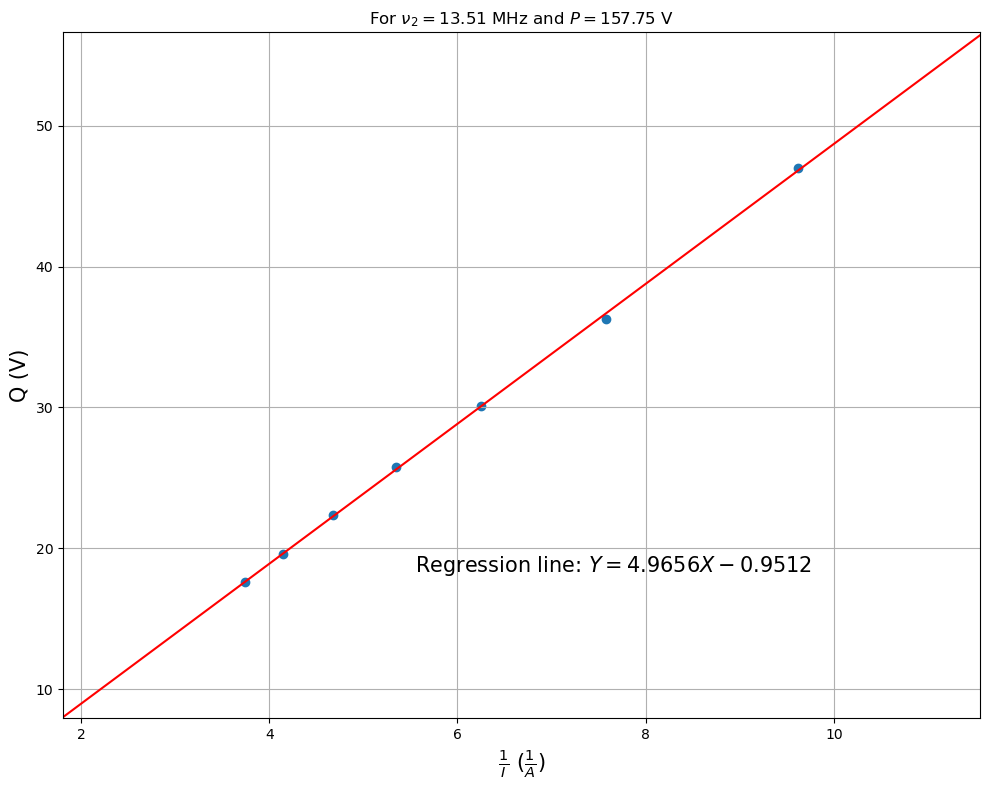

(array([-0.95116715,  4.96558025]),
 {'r2': 0.9995914586482133, 'syx': 0.23002633860180202})

In [93]:
title = r"For $\nu_2 = 13.51$ MHz and $P=157.75$ V"
file_name = "v2.jpg"
poly_regression(data["1/I"]*1000, data["2Q2"]/2, order=1, plot=True, stats=True,title=title, filename=file_name)

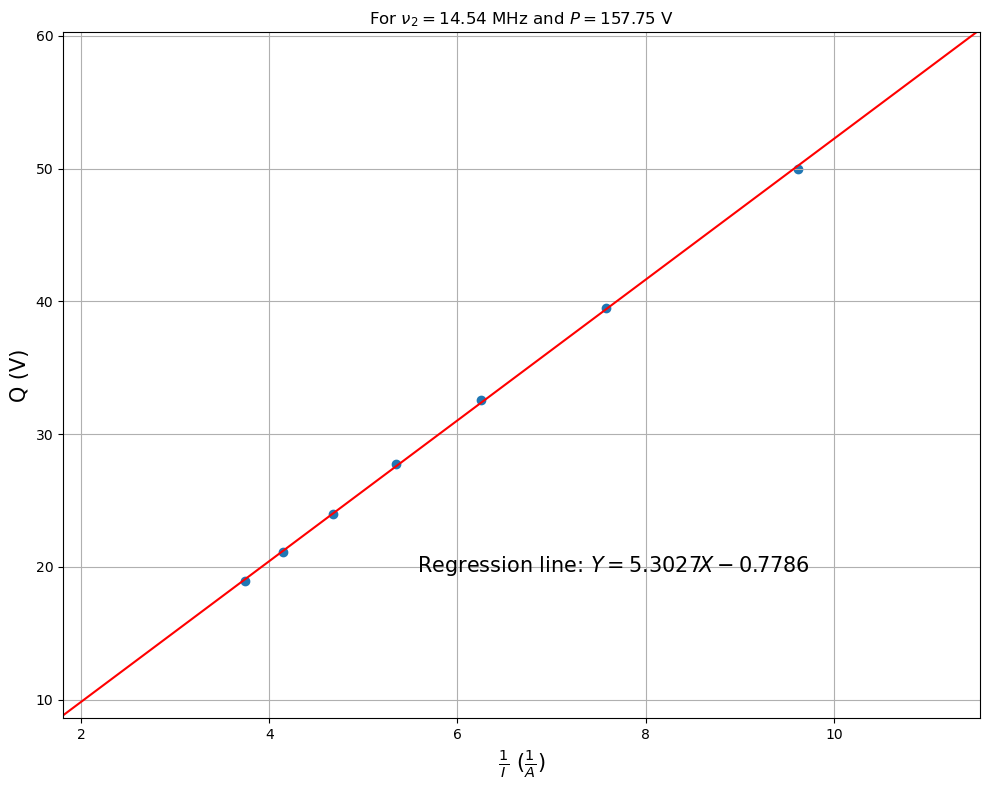

(array([-0.77860096,  5.30270003]),
 {'r2': 0.9997439384919524, 'syx': 0.19445792141467058})

In [94]:
title = r"For $\nu_2 = 14.54$ MHz and $P=157.75$ V"
file_name = "v3.jpg"
poly_regression(data["1/I"]*1000, data["2Q3"]/2, order=1, plot=True, stats=True,title=title, filename=file_name)

In [95]:
data["1/I"] = data["1/I"]*1000

In [96]:
data.columns = ["Current (mA)", "2Q For $\nu_1 = 12.61$ MHz (V)", "2Q For $\nu_1 = 13.51$ MHz (V)",
                "2Q For $\nu_1 = 14.54$ MHz (V)", r"$\frac{1}{I}$"]
data

,Current (mA),2Q For $\nu_1 = 12.61$ MHz (V),2Q For $\nu_1 = 13.51$ MHz (V),2Q For $\nu_1 = 14.54$ MHz (V),$\frac{1}{I}$
0,104,87.8,94.0,100.0,9.615385
1,132,69.5,72.5,79.0,7.575758
2,160,56.0,60.2,65.2,6.250000
3,187,48.0,51.5,55.5,5.347594
4,214,41.8,44.8,48.0,4.672897
5,241,37.5,39.2,42.2,4.149378
6,267,33.2,35.2,37.8,3.745318


In [97]:
# data.to_html("data2.html")